In [3]:
from sklearn.datasets import fetch_openml

In [19]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random  

In [4]:
mnist=fetch_openml('mnist_784',as_frame=False)

X,y=mnist.data,mnist.target
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:



X_features = X
Y_label = y
for col in X_features:
    X_features.boxplot(column=col, by=y, figsize=(6,6))
    plt.title(col)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'boxplot'

In [5]:
X=mnist.data
y=mnist.target

In [11]:
X,y=mnist.data,mnist.target
print(X)
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['5' '0' '4' ... '4' '5' '6']


AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [5]:
X_train.shape

(60000, 784)

In [12]:
y_train.shape

(60000,)

In [13]:
X_test.shape

(10000, 784)

In [16]:

print(f"Dataset shape: {X.shape}") 
print(f"Number of samples: {X.shape[0]}") 
print(f"Number of features: {X.shape[1]}")

Dataset shape: (70000, 784)
Number of samples: 70000
Number of features: 784


In [6]:
X=X/255
print(X)
y=

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
print(y)

['5' '0' '4' ... '4' '5' '6']


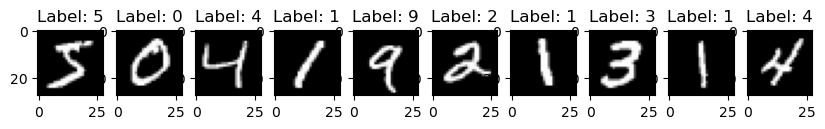

In [23]:
import matplotlib.pyplot as plt


def plot_samples(X, y, num_samples=10):
    plt.figure(figsize=(10, 2))
    for i in range(num_samples):
        plt.subplot(1, num_samples,i+1)
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {y[i]}')
        plt.axis('ON')
    plt.show()


plot_samples(X, y, num_samples=10)

In [24]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality while preserving 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

# Check the new shape after applying PCA
print(f"New shape after PCA: {X_pca.shape}")

New shape after PCA: (70000, 154)


In [8]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (60,000) and test (10,000) sets total 70000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
print(y.shape)

(70000,)


In [7]:
X=X/255
y = y.astype(int)
print(X)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[5 0 4 ... 4 5 6]


In [9]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

# Define the models
models = {
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
   # "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
   # "XGBoost": XGBClassifier()
   #svm_clf = SVC()
   #svm_clf.fit(X_train, y_train)
}

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")


SVM trained.
k-NN trained.
Random Forest trained.


In [10]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.001

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=1000.0, solver='liblinear')


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')
    
    return accuracy, precision, recall, f1

# Evaluate each model
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    print(f"{name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")


SVM - Accuracy: 0.9762857142857143, Precision: 0.976279672551265, Recall: 0.9762857142857143, F1-Score: 0.97626260197505
k-NN - Accuracy: 0.9684285714285714, Precision: 0.9686713917638357, Recall: 0.9684285714285714, F1-Score: 0.9683549666334242
Random Forest - Accuracy: 0.9664285714285714, Precision: 0.9664262098837266, Recall: 0.9664285714285714, F1-Score: 0.9664100799450638


In [13]:
import matplotlib.pyplot as plt

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot using seaborn heatmap for better visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot using seaborn heatmap for better visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
   

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
models = {
   # "SVM": SVC(),
    #"k-NN": KNeighborsClassifier(),
   # "Decision Tree": DecisionTreeClassifier(),
   # "Random Forest": RandomForestClassifier(),
   # "XGBoost": XGBClassifier()
    svm_clf = SVC()
    svm_clf.fit(X_train, y_train)
}
#for name, model in models.items():
   # model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#y_pred = svm_clf.predict(X_test)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    # Plot using seaborn heatmap for better visualization
    


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot using seaborn heatmap for better visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [29]:


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
   # clf = SVC(random_state=0)
    #cm = confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                            
    disp.plot()


    
    plt.figure(figsize=(8, 6))
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.show()

# Plot confusion matrix for each model
for name, model in models.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
  



NameError: name 'cm' is not defined

<Figure size 800x600 with 0 Axes>

In [55]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 
                 'max_depth': [10, 20, 30]}
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=3)
grid_search.fit(X_train, y_train)
# Perform grid search with cross-validation
#grid_rf = GridSearchCV(SVC, param_grid_rf, cv=3,n_jobs=-1)
#grid_rf.fit(X_train, y_train)

# Print best parameters
print(f"Best parameters for Random Forest: {grid_search.best_params_}")


In [24]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for the Random Forest model
plot_roc_curve(KNeighborsClassifier(), X_test, y_test, "Random Forest")


NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



model = SVC(kernel="linear", probability=True)
model.fit(X_train, y_train)



#decision_scores = model.decision_function(X_test)
decision_scores = model.svm_clf.predict(X_test)
fpr, tpr, thres = roc_curve(y_test, decision_scores)
print('AUC: {:.3f}'.format(roc_auc_score(y_test, decision_scores)))

# roc curve
plt.plot(fpr, tpr, "b", label='Linear SVM')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

In [2]:
#from sklearn.metrics import roc_curve, auc, precision_recall_curve

from sklearn.metrics import roc_curve, auc

# Generate ROC curve for one-vs-all SVM (binary classifier)
fpr, tpr, _ = roc_curve(y_test, svm_clf.decision_function(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()



NameError: name 'y_test' is not defined

/opt/anaconda3/envs/py-ml-env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/envs/py-ml-env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/envs/py-ml-env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/envs/py-ml-env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/opt/anaconda3/envs/py-ml-env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value shou

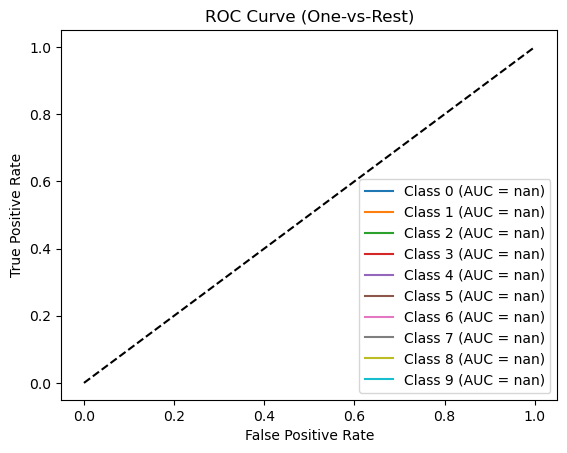

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Binarize the output labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y_test_bin.shape[1]

# One-vs-Rest (OvR) ROC curve for Random Forest (example)
classifier = OneVsRestClassifier(RandomForestClassifier())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()


/opt/anaconda3/envs/py-ml-env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/envs/py-ml-env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/envs/py-ml-env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/envs/py-ml-env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/anaconda3/envs/py-ml-env/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/opt/

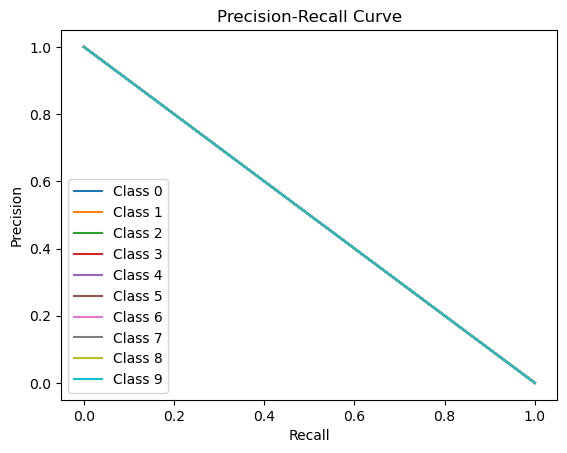

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve for each class
precision = dict()
recall = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])

# Plot the Precision-Recall curves
plt.figure()
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
